# Predictive modeling with Decision Tree
In this notebook, we explain to download the dataset and getting started with all the predictive tasks using Support Vector Machine. We will be extracting spectral features, specifically 6 rhythmic features - total power in 6 frequency bands, namely, Delta (0.5-4 Hz), Theta (4-8 Hz), Alpha (8-14 Hz), Beta (14-30 Hz), Low Gamma (30-47 Hz), and High Gamma (47-64 Hz). For preprocessing, we filter EEG first with 0.5 Hz highpass and then remove Artifact with ICA based approach. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-Data---if-not-downloaded-already" data-toc-modified-id="Download-Data---if-not-downloaded-already-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download Data - if not downloaded already</a></span></li><li><span><a href="#Locate-the-subject's-file" data-toc-modified-id="Locate-the-subject's-file-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Locate the subject's file</a></span></li><li><span><a href="#Loading-data-and-preprocessing" data-toc-modified-id="Loading-data-and-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading data and preprocessing</a></span><ul class="toc-item"><li><span><a href="#Data-of-Subject=1--[~19min]" data-toc-modified-id="Data-of-Subject=1--[~19min]-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data of Subject=1  [~19min]</a></span></li></ul></li><li><span><a href="#Feature-Extraction---Rhythmic-Features-[~3min]" data-toc-modified-id="Feature-Extraction---Rhythmic-Features-[~3min]-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Extraction - Rhythmic Features [~3min]</a></span></li><li><span><a href="#Predictive-Modeling-with-Decision-Tree" data-toc-modified-id="Predictive-Modeling-with-Decision-Tree-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Modeling with Decision Tree</a></span><ul class="toc-item"><li><span><a href="#T4-Task:-LWR-classification" data-toc-modified-id="T4-Task:-LWR-classification-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>T4 Task: LWR classification</a></span></li><li><span><a href="#T3-Task:-Semanticity-classification" data-toc-modified-id="T3-Task:-Semanticity-classification-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>T3 Task: Semanticity classification</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pip install phyaat  # if not installed yet

import phyaat
print('Version :' ,phyaat.__version__)
import phyaat as ph

PhyAAt Processing lib Loaded...
Version : 0.0.2


## Download Data - if not downloaded already

In [3]:
# Download dataset of one subject only (subject=1)
# To download data of all the subjects use subject =-1 or for specify for one e.g.subject=10

dirPath = ph.download_data(baseDir='../PhyAAt_Data', subject=1,verbose=0,overwrite=False)

## Locate the subject's file

In [4]:
baseDir='../PhyAAt_Data'   # or dirPath return path from above

#returns a dictionary containing file names of all the subjects available in baseDir
SubID = ph.ReadFilesPath(baseDir) 

#check files of subject=1
SubID[1]

Total Subjects :  1


{'sigFile': '../PhyAAt_Data/phyaat_dataset/Signals/S1/S1_Signals.csv',
 'txtFile': '../PhyAAt_Data/phyaat_dataset/Signals/S1/S1_Textscore.csv'}

## Loading data and preprocessing

### Data of Subject=1  [~19min]

In [6]:
# Create a Subj holding dataset of subject=1

Subj = ph.Subject(SubID[1])

#filtering with highpass filter of cutoff frequency 0.5Hz

Subj.filter_EEG(band =[0.5],btype='highpass',order=5)


#Remving Artifact using ICA, setting window size to 256 (2sec), which is larg, but takes less time

Subj.correct(method='ICA',verbose=1,winsize=128*2) 

ICA Artifact Removal : extended-infomax
100%|####################################################################################################|


## Feature Extraction - Rhythmic Features [~3min]

In [8]:
# setting task=-1, does extract the features from all the segmensts for all the four tasks and 
# returns y_train as (n,4), one coulum for each task. Next time extracting Xy for any particular
# task won't extract the features agains, unless you force it by setting 'redo'=True.

X_train,y_train,X_test, y_test = Subj.getXy_eeg(task=4)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)

100%|##################################################|100\100|Sg - 0
Done..
100%|##################################################|100\100|Sg - 1
Done..
100%|##################################################|100\100|Sg - 2
Done..
100%|##################################################|43\43|Sg - 0
Done..
100%|##################################################|43\43|Sg - 1
Done..
100%|##################################################|43\43|Sg - 2
Done..
DataShape:  (290, 84) (290,) (120, 84) (120,)


## Predictive Modeling with Decision Tree

In [9]:
from spkit.ml import ClassificationTree

### T4 Task: LWR classification

In [10]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=4)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nClass labels :',np.unique(y_train))

DataShape:  (290, 84) (290,) (120, 84) (120,)

Class labels : [0 1 2]


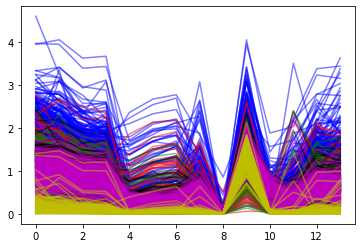

In [39]:
plt.plot(X_train[:,:14].T,'b',alpha=0.5)
plt.plot(X_train[:,14:14*2].T,'r',alpha=0.5)
plt.plot(X_train[:,2*14:14*3].T,'g',alpha=0.5)
plt.plot(X_train[:,3*14:14*4].T,'k',alpha=0.5)
plt.plot(X_train[:,4*14:14*5].T,'m',alpha=0.5)
plt.plot(X_train[:,5*14:14*6].T,'y',alpha=0.5)
plt.show()

In [47]:
ch_names = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
bands = ['d','t','a','b','g1','g2']

feature_names = [[st+ch for ch in ch_names] for st in bands]
feature_names =  [f for flist in feature_names for f in flist]
#feature_names

In [49]:
clf = ClassificationTree(max_depth=3)
clf.fit(X_train,y_train,feature_names=feature_names,verbose=1)
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

ytpr = clf.predict_proba(X_train)[:,1]
yspr = clf.predict_proba(X_test)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==y_train))
print('- Testing  : ',np.mean(ysp==y_test))
print('Logloss')
Trloss = -np.mean(y_train*np.log(ytpr+1e-10)+(1-y_train)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(y_test*np.log(yspr+1e-10)+(1-y_test)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Number of features:: 84
Number of samples :: 290
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->||
|.........................tree is buit!
---------------------------------------
Depth of trained Tree  3
Accuracy
- Training :  0.8758620689655172
- Testing  :  0.7666666666666667
Logloss
- Training :  13.406930498304638
- Testing  :  11.996393111286006


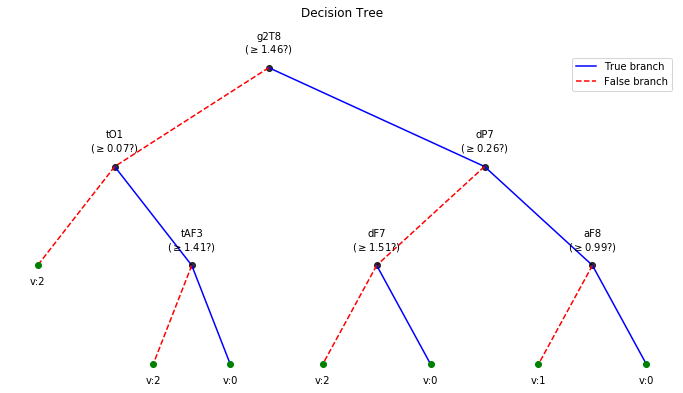

In [50]:
plt.figure(figsize=(12,6))
clf.plotTree()

### T3 Task: Semanticity classification

In [51]:
X_train,y_train, X_test,y_test = Subj.getXy_eeg(task=3)

print('DataShape: ',X_train.shape,y_train.shape,X_test.shape, y_test.shape)
print('\nClass labels :',np.unique(y_train))

DataShape:  (100, 84) (100,) (43, 84) (43,)

Class labels : [0 1]


In [52]:
clf = ClassificationTree(max_depth=3)
clf.fit(X_train,y_train,feature_names=feature_names,verbose=1)
ytp = clf.predict(X_train)
ysp = clf.predict(X_test)

ytpr = clf.predict_proba(X_train)[:,1]
yspr = clf.predict_proba(X_test)[:,1]

print('Depth of trained Tree ', clf.getTreeDepth())
print('Accuracy')
print('- Training : ',np.mean(ytp==y_train))
print('- Testing  : ',np.mean(ysp==y_test))
print('Logloss')
Trloss = -np.mean(y_train*np.log(ytpr+1e-10)+(1-y_train)*np.log(1-ytpr+1e-10))
Tsloss = -np.mean(y_test*np.log(yspr+1e-10)+(1-y_test)*np.log(1-yspr+1e-10))
print('- Training : ',Trloss)
print('- Testing  : ',Tsloss)

Number of features:: 84
Number of samples :: 100
---------------------------------------
|Building the tree.....................
|subtrees::|100%|-------------------->||
|.........................tree is buit!
---------------------------------------
Depth of trained Tree  3
Accuracy
- Training :  0.74
- Testing  :  0.46511627906976744
Logloss
- Training :  0.49239269155167276
- Testing  :  3.7858985672861363


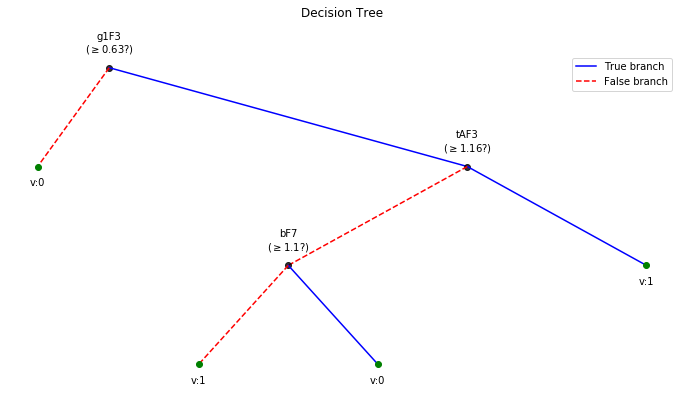

In [53]:
plt.figure(figsize=(12,6))
clf.plotTree()